In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# reading all the csv files 
Albedo_dataframe = pd.read_csv("/content/mercury-albedo-top-half.png.csv",header = None)
AlSi_dataframe = pd.read_csv("/content/alsimap_smooth_032015.png.csv",header = None)
CaSi_dataframe = pd.read_csv("/content/casimap_smooth_032015.png.csv",header = None)
FeSi_dataframe = pd.read_csv("/content/fesimap_smooth_032015.png.csv",header = None)
MgSi_dataframe = pd.read_csv("/content/mgsimap_smooth_032015.png.csv",header = None)
SSi_dataframe = pd.read_csv("/content/ssimap_smooth_032015.png.csv",header = None)
Albedo_test_dataframe = pd.read_csv("/content/mercury-albedo-resized-bottom-half.png.csv",header = None)

In [3]:
# function to change the dataframe to a list 
def make_list (final_list, dataframe):
  for index,row in dataframe.iterrows():
    for column in dataframe:
      final_list.append(row[column])
  return final_list

In [4]:
# initializing empty list of each csv file 
AlSi_train_list = []
Albedo_train_list = []
CaSi_train_list = []
FeSi_train_list = []
MgSi_train_list = []
SSi_train_list = []
Albedo_test_list = []

In [5]:
# making list of each csv file 
AlSi_train_list = make_list(AlSi_train_list,AlSi_dataframe)
Albedo_train_list = make_list(Albedo_train_list,Albedo_dataframe)
CaSi_train_list = make_list(CaSi_train_list,CaSi_dataframe)
FeSi_train_list = make_list(FeSi_train_list,FeSi_dataframe)
MgSi_train_list = make_list(MgSi_train_list,MgSi_dataframe)
SSi_train_list = make_list(SSi_train_list,SSi_dataframe)
Albedo_test_list = make_list(Albedo_test_list,Albedo_test_dataframe)

In [6]:
# creating the train dataframe 
train_dataframe = pd.DataFrame(Albedo_train_list,columns = ['Albedo'])
train_dataframe["AlSi"] = AlSi_train_list
train_dataframe["CaSi"] = CaSi_train_list
train_dataframe["FeSi"] = FeSi_train_list
train_dataframe["MgSi"] = MgSi_train_list
train_dataframe["SSi"] = SSi_train_list

In [7]:
# creating the test dataframe 
test_dataframe = pd.DataFrame(Albedo_test_list,columns = ['Albedo'])

In [8]:
# a function which plots graphs of a dataframe
def make_plot_dataframe (dataframe) :
  plt.figure(figsize=(8,5),dpi = 100)
  plt.imshow(dataframe)
  plt.colorbar()
  plt.show()

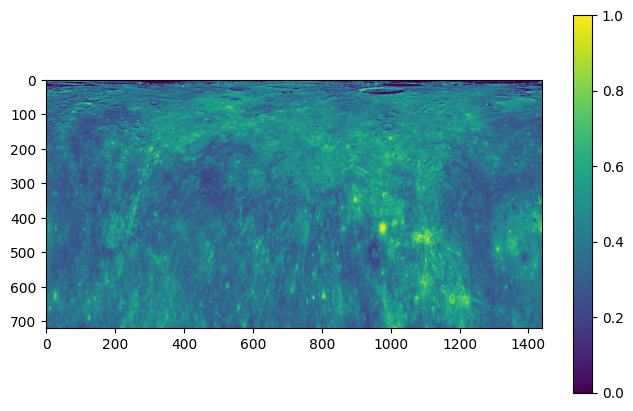

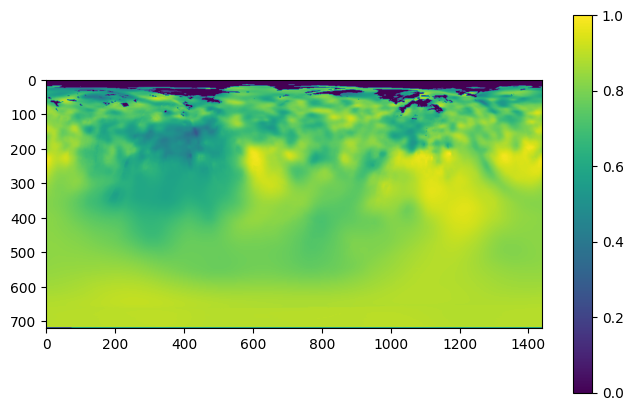

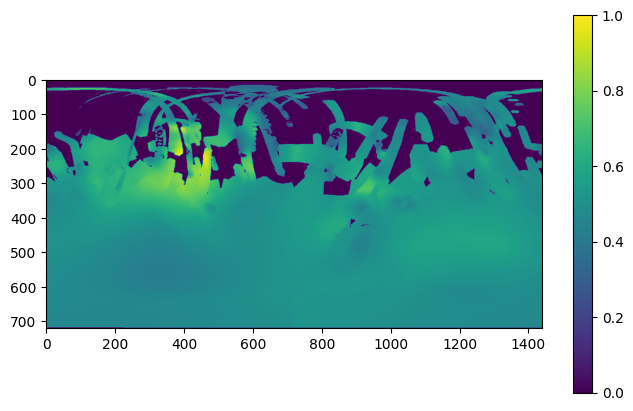

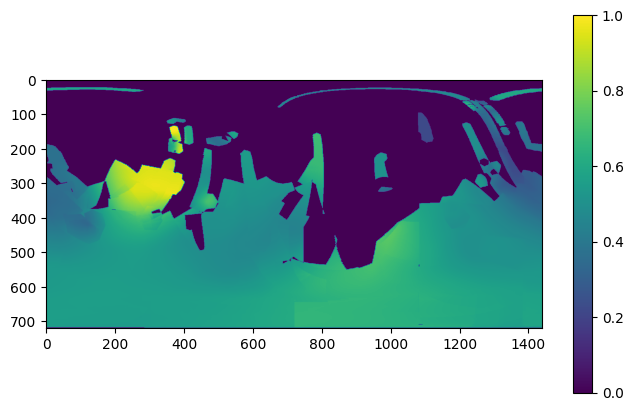

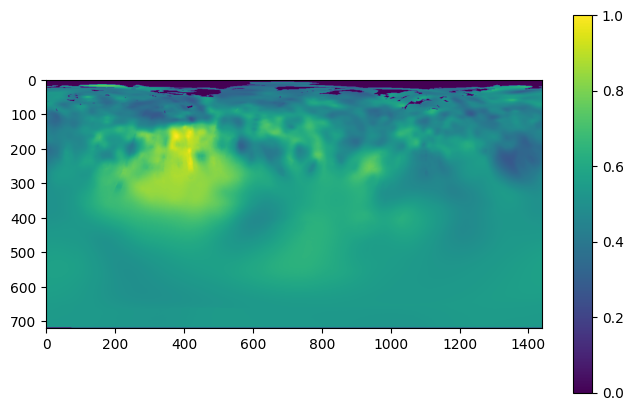

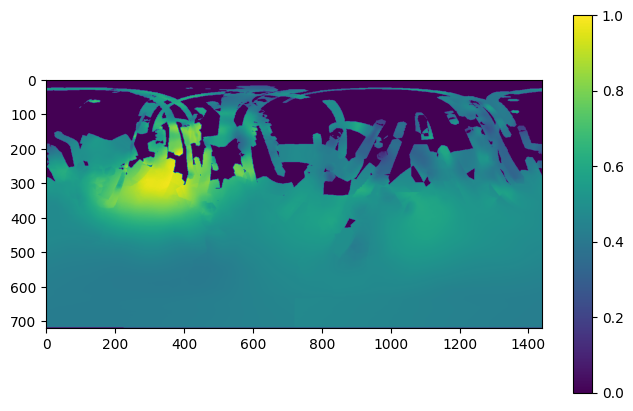

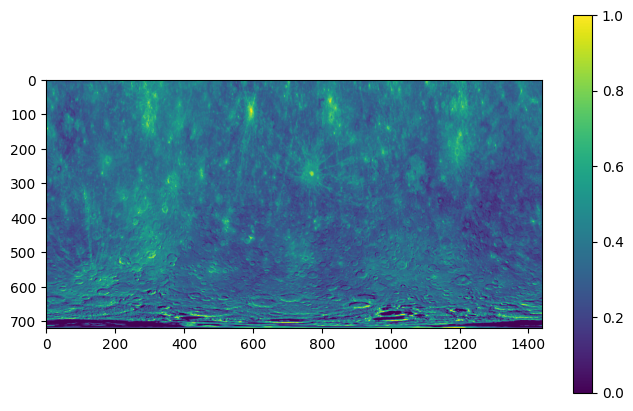

In [9]:
# making plots of each dataframe
make_plot_dataframe(Albedo_dataframe)
make_plot_dataframe(AlSi_dataframe)
make_plot_dataframe(CaSi_dataframe)
make_plot_dataframe(FeSi_dataframe)
make_plot_dataframe(MgSi_dataframe)
make_plot_dataframe(SSi_dataframe)
make_plot_dataframe(Albedo_test_dataframe)

In [10]:
# correlation in the train_dataframe with 'Albedo'
train_dataframe.corr()['Albedo']

Albedo    1.000000
AlSi      0.101683
CaSi      0.002648
FeSi     -0.045356
MgSi      0.084904
SSi      -0.024850
Name: Albedo, dtype: float64

In [11]:
# importing varioous important libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# data preprocesssing for 2 and 3 degreee polynomial.
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(np.array(train_dataframe['Albedo']).reshape(-1,1))

poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(np.array(train_dataframe['Albedo']).reshape(-1,1))

In [13]:
# model_prediction makes 5 models particularly
# Linear Regression
# Random Forest Regressor
# Bayesian Ridge
# Polynomial Regression of 2 degreee
# polynomial Regression of 3 degree

# also appends all the scores to a list passed initially to the function

def model_prediction(X_train,y_train,string,list_of_scores):
  print(string)
  # model 1: Linear Regression
  print("Linear Regression")
  model = LinearRegression()
  model.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) 
  list_of_scores.append(model.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)))

  # model 2 : RandomForestRegressor() model
  print("Random Forest Regresion")  
  regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
  regressor.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) 
  list_of_scores.append(regressor.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)))

  # model 3 : BayesianRidge() model
  print("Bayesian Ridge Model")
  clf = linear_model.BayesianRidge()
  clf.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) 
  list_of_scores.append(clf.score(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)))

  # model 4 : Polynomial Regression model (degree = 2)
  print("Polynomial Regression model (degree = 2)")
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly_2, np.array(y_train).reshape(-1,1))
  y_pred = lin_reg.predict(X_poly_2)
  list_of_scores.append(r2_score(y_train,y_pred))

  # model 5 : Polynomial Regression model (degree = 3)
  print("Ploynomial Regression model (degree = 3)")
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly_3, np.array(train_dataframe['AlSi']).reshape(-1,1))
  y_pred = lin_reg.predict(X_poly_3)
  list_of_scores.append(r2_score(np.array(y_train).reshape(-1,1),y_pred))


In [14]:
# creating empty list for each element
list_of_AlSi = []
list_of_CaSi = []
list_of_MgSi = []
list_of_FeSi = []
list_of_SSi = []

In [15]:
model_prediction(train_dataframe["Albedo"],train_dataframe["AlSi"],"Alsi",list_of_AlSi)
model_prediction(train_dataframe["Albedo"],train_dataframe["CaSi"],"Casi",list_of_CaSi)
model_prediction(train_dataframe["Albedo"],train_dataframe["MgSi"],"Mgsi",list_of_MgSi)
model_prediction(train_dataframe["Albedo"],train_dataframe["FeSi"],"Fesi",list_of_FeSi)
model_prediction(train_dataframe["Albedo"],train_dataframe["SSi"],"Ssi",list_of_SSi)

Alsi
Linear Regression
Random Forest Regresion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bayesian Ridge Model
Polynomial Regression model (degree = 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ploynomial Regression model (degree = 3)
Casi
Linear Regression
Random Forest Regresion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bayesian Ridge Model
Polynomial Regression model (degree = 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ploynomial Regression model (degree = 3)
Mgsi
Linear Regression
Random Forest Regresion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bayesian Ridge Model
Polynomial Regression model (degree = 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ploynomial Regression model (degree = 3)
Fesi
Linear Regression
Random Forest Regresion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bayesian Ridge Model
Polynomial Regression model (degree = 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ploynomial Regression model (degree = 3)
Ssi
Linear Regression
Random Forest Regresion


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Bayesian Ridge Model
Polynomial Regression model (degree = 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ploynomial Regression model (degree = 3)


In [16]:
# creating a dataframe of all the regressor vs element 
r2_scores = pd.DataFrame([list_of_AlSi,list_of_CaSi,list_of_FeSi,list_of_MgSi,list_of_SSi],columns = [["AlSi","CaSi","FeSi","MgSi","SSi"]],index = [["Linear Regression","Random Forest Regression","Bayesian Ridge","Polynomial Regression 2","Polynomial Regression 3"]])

In [17]:
# printing r2_scores of all the models.
r2_scores

,AlSi,CaSi,FeSi,MgSi,SSi
Linear Regression,0.010339,0.146730,0.010339,0.113344,0.132415
Random Forest Regression,0.000007,0.051508,0.000007,0.024710,-2.290325
Bayesian Ridge,0.002057,0.046095,0.002057,0.021224,-2.273769
Polynomial Regression 2,0.007209,0.118882,0.007209,0.085972,-2.306757
Polynomial Regression 3,0.000618,0.051358,0.000618,0.022017,-2.500925


In [18]:
# model 6 : Neural Network

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D,Flatten,InputLayer, BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from sklearn.metrics import accuracy_score

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = np.array(train_dataframe["Albedo"]).reshape(-1,1).shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(4, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(5, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(train_dataframe["Albedo"],train_dataframe[["AlSi","CaSi","FeSi","MgSi","SSi"]], epochs=10, batch_size=1028, validation_data=(train_dataframe["Albedo"],train_dataframe[["AlSi","CaSi","FeSi","MgSi","SSi"]]))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25        
Total params: 9,645
Trainable params: 9,645
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1009/1009 [==============================] - 7s 7ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - val_l

In [19]:
# predicting the train_dataset again on Neural Network model
predicted = NN_model.predict(train_dataframe["Albedo"])

In [20]:
# creating a dataframe of all the predicted values
predicted_dataframe = pd.DataFrame(predicted[:,0],columns = ['AlSi'])
predicted_dataframe["CaSi"] = predicted[:,1]
predicted_dataframe["FeSi"] = predicted[:,2]
predicted_dataframe["MgSi"] = predicted[:,3]
predicted_dataframe["SSi"] = predicted[:,4]

In [21]:
# as all the models are compared through r2_scores appending the r2_scores for the neural network.

new_row = [r2_score(train_dataframe["AlSi"],predicted_dataframe["AlSi"]),
r2_score(train_dataframe["CaSi"],predicted_dataframe["CaSi"]),
r2_score(train_dataframe["FeSi"],predicted_dataframe["FeSi"]),
r2_score(train_dataframe["MgSi"],predicted_dataframe["MgSi"]),
r2_score(train_dataframe["SSi"],predicted_dataframe["SSi"])
]

r2_scores.loc["Neural Network"] = new_row

In [22]:
r2_scores

,AlSi,CaSi,FeSi,MgSi,SSi
"(Linear Regression,)",0.010339,0.146730,0.010339,0.113344,0.132415
"(Random Forest Regression,)",0.000007,0.051508,0.000007,0.024710,-2.290325
"(Bayesian Ridge,)",0.002057,0.046095,0.002057,0.021224,-2.273769
"(Polynomial Regression 2,)",0.007209,0.118882,0.007209,0.085972,-2.306757
"(Polynomial Regression 3,)",0.000618,0.051358,0.000618,0.022017,-2.500925
Neural Network,0.068718,-0.101432,-0.218587,0.099669,-0.044628



### **As we can see that Linear Regression has performed better as compared to all the other regression model.**

So, we are going to use this for the prediction of test dataframe.

In [23]:
# making list to append the coefficient and intercept of different models
model_AlSi_list = []
model_CaSi_list = []
model_FeSi_list = []
model_MgSi_list = []
model_SSi_list = []

In [24]:
# making linear model for prediciting values of test_dataset
def linear_model_making(X_train,y_train,model_list):
  model = LinearRegression()
  model.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) 
  model_list.append(np.float(model.coef_))
  model_list.append(np.float(model.intercept_))
  return model

In [25]:
# predicting the values of test_dataframe with help of Linear Regression
model_AlSi = linear_model_making(train_dataframe['Albedo'],train_dataframe['AlSi'],model_AlSi_list)
model_CaSi = linear_model_making(train_dataframe['Albedo'],train_dataframe['CaSi'],model_CaSi_list)
model_FeSi = linear_model_making(train_dataframe['Albedo'],train_dataframe['FeSi'],model_FeSi_list)
model_MgSi = linear_model_making(train_dataframe['Albedo'],train_dataframe['MgSi'],model_MgSi_list)
model_SSi = linear_model_making(train_dataframe['Albedo'],train_dataframe['SSi'],model_SSi_list)

In [26]:
# making a dataframe of all the intercept and coefficient
coef_and_intercep = pd.DataFrame([model_AlSi_list,model_CaSi_list,model_FeSi_list,model_MgSi_list,model_SSi_list],columns= ['Coefficient','Intercept'],index=[['AlSi','CaSi','FeSi','MgSi','SSi']])

In [27]:
coef_and_intercep

,Coefficient,Intercept
AlSi,0.173653,0.679063
CaSi,0.005125,0.406506
FeSi,-0.112581,0.360550
MgSi,0.104388,0.487055
SSi,-0.049156,0.406332


In [28]:
# predicting by the previous models 
prediction_AlSi = model_AlSi.predict(np.array(test_dataframe['Albedo']).reshape(-1,1))
prediction_CaSi = model_CaSi.predict(np.array(test_dataframe['Albedo']).reshape(-1,1))
prediction_FeSi = model_FeSi.predict(np.array(test_dataframe['Albedo']).reshape(-1,1))
prediction_MgSi = model_MgSi.predict(np.array(test_dataframe['Albedo']).reshape(-1,1))
prediction_SSi = model_SSi.predict(np.array(test_dataframe['Albedo']).reshape(-1,1))

In [29]:
# reshaping the prediction in form of 720,1440 and creating a dataframe
predicted_AlSi = pd.DataFrame(prediction_AlSi.reshape(720,1440))
predicted_CaSi = pd.DataFrame(prediction_CaSi.reshape(720,1440))
predicted_FeSi = pd.DataFrame(prediction_FeSi.reshape(720,1440))
predicted_MgSi = pd.DataFrame(prediction_MgSi.reshape(720,1440))
predicted_SSi = pd.DataFrame(prediction_SSi.reshape(720,1440))

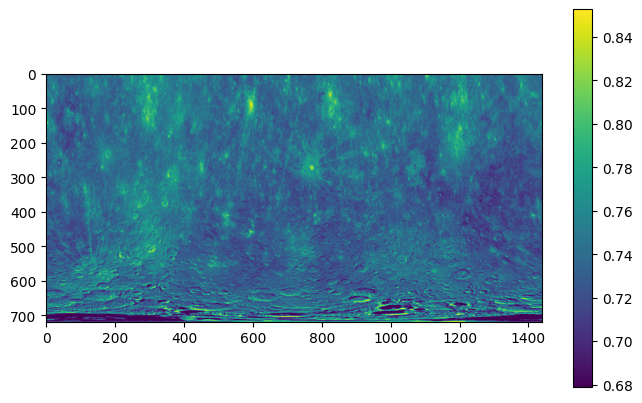

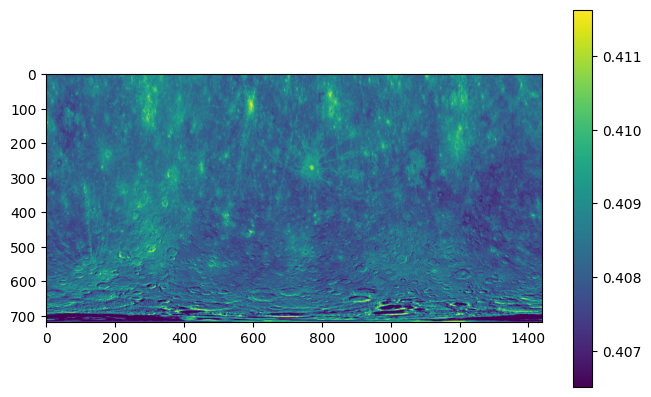

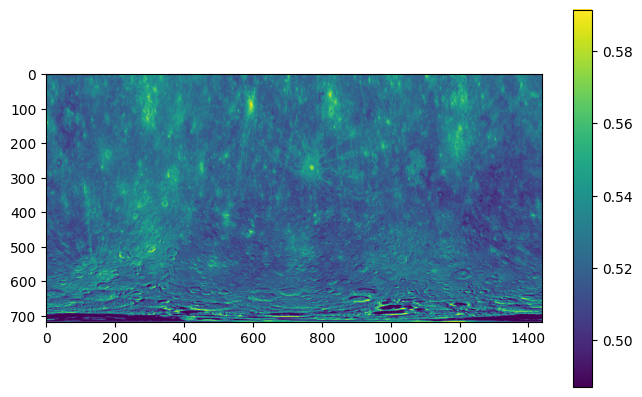

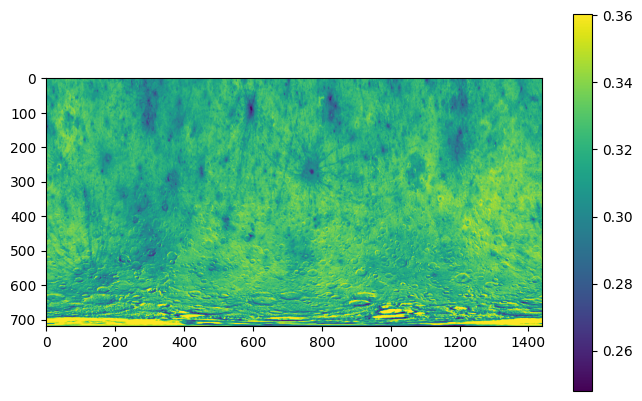

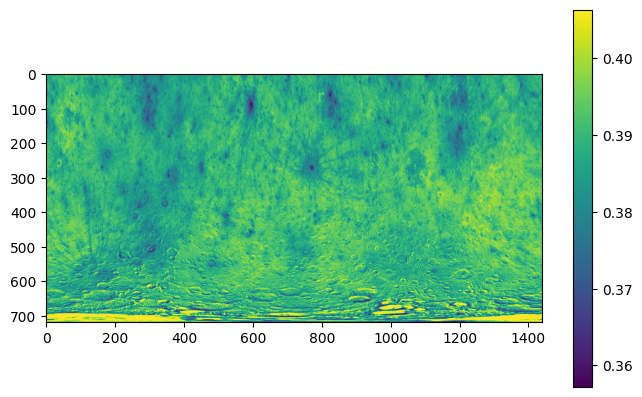

In [30]:
# plotting all the predicted dataframe
make_plot_dataframe(predicted_AlSi)
make_plot_dataframe(predicted_CaSi)
make_plot_dataframe(predicted_MgSi)
make_plot_dataframe(predicted_FeSi)
make_plot_dataframe(predicted_SSi)

In [35]:
#exporting all the dataframes files to .csv files 
predicted_AlSi.to_csv("/content/AlSi.csv",index = False,header = False)
predicted_CaSi.to_csv("/content/CaSi.csv",index = False,header = False)
predicted_FeSi.to_csv("/content/FeSi.csv",index = False,header = False)
predicted_MgSi.to_csv("/content/MgSi.csv",index = False,header = False)
predicted_SSi.to_csv("/content/SSi.csv",index = False,header = False)

In [34]:
r2_scores.to_csv("/content/r2_scores.csv",index = True)
coef_and_intercep.to_csv("/content/coef_and_intercept.csv",index = True)